# PNEUMONIA - CHEST XRAY CLASSIFIER (INTO NORMAL, VIRAL and BACTERIAL PNEUMONIA)

In [ ]:
!pip install kagglehub

import kagglehub

# Download the dataset
kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

100%|██████████| 2.29G/2.29G [00:22<00:00, 107MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2'

In [ ]:
import shutil

src_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
dest_path = "/content/chest_xray_data"

# Move the dataset
shutil.move(src_path, dest_path)

print(f"Dataset moved to {dest_path}")


Dataset moved to /content/chest_xray_data


We made a pneumonia classifier using the Fast.ai library and ResNet CNN model. The classifier is designed to detect the type of pneumonia in medical images, which will aid doctors in making informed treatment decisions. With this tool, we hope to contribute to improving healthcare outcomes

Made By :
    Arshiya sethi
    Divyam malik
    Taanisha aggarwal
    Karan chhabra

As we have viral and bacterial pneumonia images in the same folder, we will separate them into 2 different folders one for VIRAL and another BACTERIAL

## Preprocessing

In [ ]:
import os
import shutil

# define the input folder path
input_folder = "/content/chest_xray_data/chest_xray/train"

# define the output folder paths
bacteria_folder = "/content/chest_xray_data/chest_xray/train/PNEUMONIA/BACTERIAL"
virus_folder = "/content/chest_xray_data/chest_xray/train/PNEUMONIA/VIRAL"

# create the output folders if they don't exist
os.makedirs(bacteria_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# loop through all the files in the input folder
for filename in os.listdir("/content/chest_xray_data/chest_xray/train/PNEUMONIA"):
    # check if the filename contains "bacteria" or "virus"
    if "bacteria" in filename.lower():
        # move the file to the bacteria folder
        shutil.move(os.path.join("/content/chest_xray_data/chest_xray/train/PNEUMONIA", filename), bacteria_folder)
    elif "virus" in filename.lower():
        # move the file to the virus folder
        shutil.move(os.path.join("/content/chest_xray_data/chest_xray/train/PNEUMONIA", filename), virus_folder)

Now I manually deleted the empty PNEUMONIA folder as its content was tranferred into two folders BACTERIAL and VIRAL

## Training the model using FastAI library Resnet50 Model

Importing fastbook library

In [ ]:
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

As our data was already divided in normal, virus and bacterial, we didn't have to preprocess it much and split it into train and test

In [ ]:
lung_types = 'NORMAL','VIRUS','BACTERIA'
path = Path('/content/chest_xray_data/chest_xray/train')

In [ ]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(128)
)

dls = lungs.dataloaders(path)

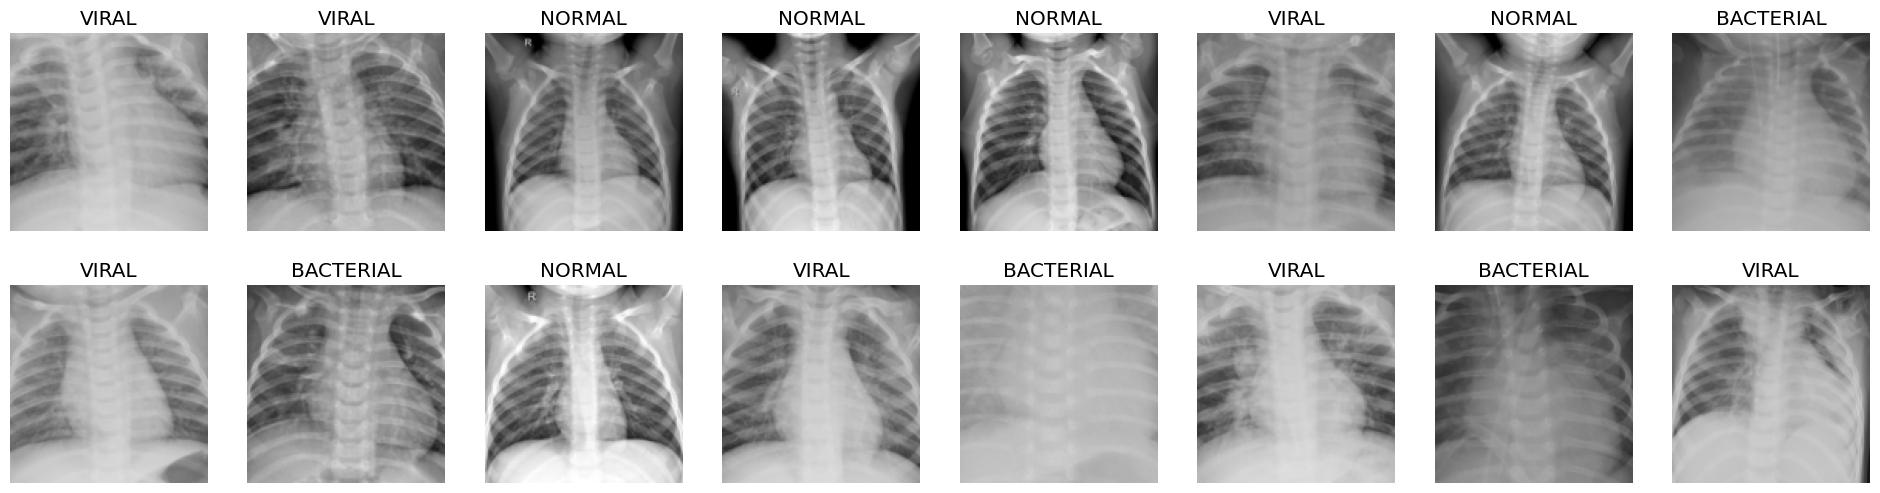

In [ ]:
dls.valid.show_batch(max_n=16, nrows=2)

Now we're going to train our model using Resnet50 CNN model in FastAI library

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(25)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 121MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.248980,0.888195,0.695110,14:37


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

Now our model is trained and we're print its Confusion matrix

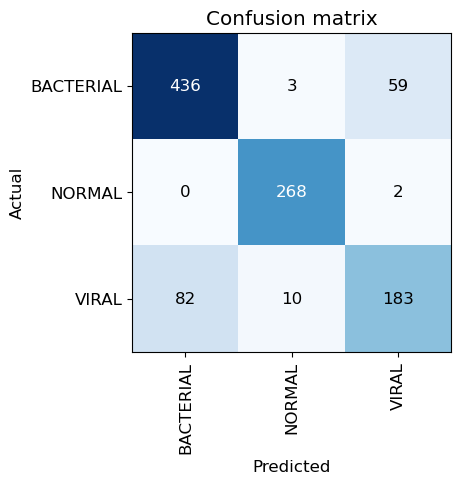

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Testing our model

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Now we will test it on random individual images specifying there path

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('C:\\Users\\Divyam\\Desktop\\project new\\train\\BACTERIAL\\person9_bacteria_41.jpeg')  #path of the image we're testing

('BACTERIAL', tensor(0), tensor([9.9908e-01, 3.1078e-05, 8.8727e-04]))

In [ ]:
learn_inf.predict('C:\\Users\\Divyam\\Desktop\\project new\\testing folder\\person639_virus_1220.jpeg')

('VIRAL', tensor(2), tensor([1.6142e-02, 5.0417e-05, 9.8381e-01]))

In [ ]:
learn_inf.predict('C:\\Users\\Divyam\\Desktop\\project new\\testing folder\\IM-_normal_0029-0001.jpeg')

('NORMAL', tensor(1), tensor([2.3600e-06, 9.9998e-01, 1.3114e-05]))

Following code will take 10 random images from my testing folder and it will show actual value and predicted value

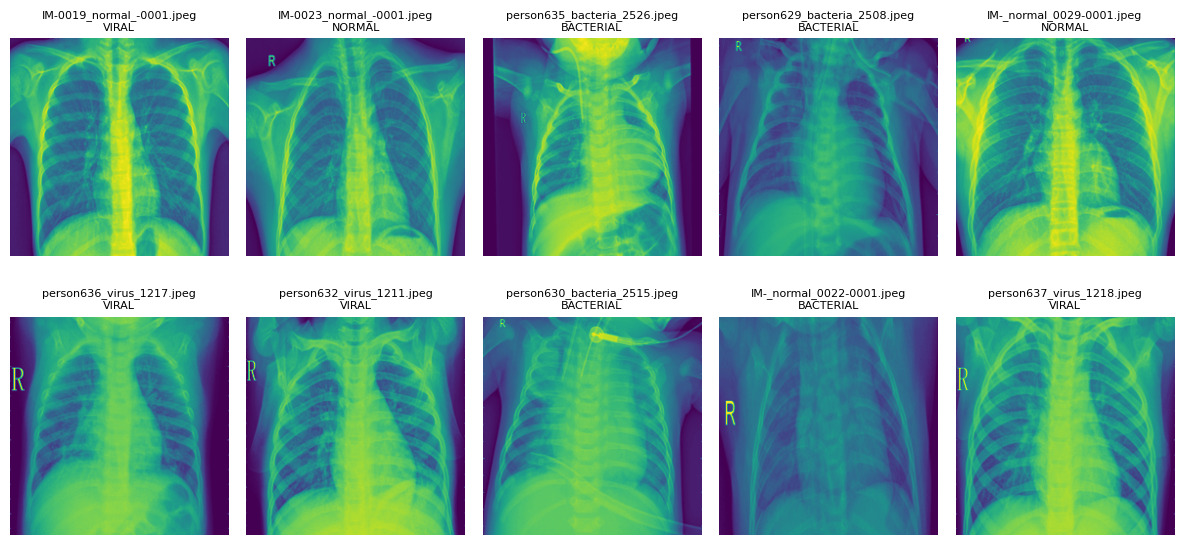

In [ ]:
import random
from PIL import Image

# Get the paths to 10 random test images
test_path = Path('C:\\Users\\Divyam\\Desktop\\project new\\testing folder')
test_images = get_image_files(test_path)
random_images = random.sample(test_images, 10)

# Load the exported learner
learn_inf = load_learner(path/'export.pkl')

# Create a 2x5 table to display the images and their predictions
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Loop through the 10 images and show the predicted labels
for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    predicted_label, _, _ = learn_inf.predict(img)

    # Display the image along with the predicted label
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(f"{img_path.name}\n{predicted_label}", fontsize=8)

plt.tight_layout()
plt.show()


## Now we're going to add interface for frontend

First i will install gradio using -pip install gradio

In [ ]:
import gradio as gr
from fastai.vision.all import *
from PIL import Image

I made predict_img function that will be passed to gradio interface

In [ ]:
import io
learn_inf = load_learner(path/'export.pkl')
def predict_image(img):
    # Convert numpy array to PIL Image
    img = PIL.Image.fromarray(img)

    # Resize the uploaded image
    img = img.resize((224, 224))

    pred,_,_ = learn_inf.predict(img)

    # Return the predicted label
    return pred




# Define the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.components.Image(),
    outputs=gr.components.Textbox(label="Predicted Label"),
    title="Pneumonia Classification",
    description="Upload an image of a chest x-ray to classify it as normal, bacterial pneumonia, or viral pneumonia."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.
